## Results Analysis

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
sns.set(rc = {'figure.figsize':(15,8)})

In [43]:
results = pd.read_csv("./results/first_full_set.csv")
results.head()

,feature_type,dataset,difficulty,query type,alpha,diffusion scalar,distance metric,mAP,precision at 1,precision at 5,precision at 10
0,swin,ox,E,basic,NaN,NaN,euclidean,0.883828,0.885714,0.737143,0.672857
1,swin,ox,E,expanded,0.25,NaN,euclidean,0.883849,0.885714,0.737143,0.671429
2,swin,ox,E,expanded,0.50,NaN,euclidean,0.882979,0.885714,0.737143,0.671429
3,swin,ox,E,expanded,0.75,NaN,euclidean,0.882108,0.885714,0.737143,0.670000
4,swin,ox,E,expanded,1.00,NaN,euclidean,0.881425,0.885714,0.737143,0.670000


## Verify accuracy using oldenburger data

In [10]:
results[(results["query type"] == "basic") & (results["distance metric"] == "cosine")].sort_values(by = ["feature_type", "dataset", "difficulty"])

,feature_type,dataset,difficulty,query type,alpha,diffusion scalar,distance metric,mAP,precision at 1,precision at 5,precision at 10
137,resnet,ox,E,basic,NaN,NaN,cosine,0.843387,0.785714,0.725714,0.688571
159,resnet,ox,H,basic,NaN,NaN,cosine,0.783379,0.742857,0.748571,0.685714
148,resnet,ox,M,basic,NaN,NaN,cosine,0.801790,0.785714,0.762857,0.742857
170,resnet,par,E,basic,NaN,NaN,cosine,0.999973,1.000000,1.000000,1.000000
192,resnet,par,H,basic,NaN,NaN,cosine,0.998139,1.000000,1.000000,1.000000
181,resnet,par,M,basic,NaN,NaN,cosine,0.999449,1.000000,1.000000,1.000000
269,sift-10k,ox,E,basic,NaN,NaN,cosine,0.358068,0.485714,0.420000,0.382857
291,sift-10k,ox,H,basic,NaN,NaN,cosine,0.330696,0.514286,0.382857,0.341429
280,sift-10k,ox,M,basic,NaN,NaN,cosine,0.332913,0.557143,0.442857,0.405714
302,sift-10k,par,E,basic,NaN,NaN,cosine,0.560652,0.885714,0.862857,0.815714


## New Columns for views

In [71]:
str(np.nan)

'nan'

In [73]:
results["data + diff"] = results["dataset"] + " " + results["difficulty"]
results["alpha inc base"] = results["alpha"].copy()
results.loc[results["query type"] == "basic", "alpha inc base"] = 0
results["type + dist metric"] = results["query type"] + " " + results["distance metric"]
results.loc[results["query type"] == "diffusion", "type + dist metric"] = "diffusion"

results.head(11)

,feature_type,dataset,difficulty,query type,alpha,diffusion scalar,distance metric,mAP,precision at 1,precision at 5,precision at 10,data + diff,alpha inc base,type + dist metric
0,swin,ox,E,basic,NaN,NaN,euclidean,0.883828,0.885714,0.737143,0.672857,ox E,0.00,basic euclidean
1,swin,ox,E,expanded,0.25,NaN,euclidean,0.883849,0.885714,0.737143,0.671429,ox E,0.25,expanded euclidean
2,swin,ox,E,expanded,0.50,NaN,euclidean,0.882979,0.885714,0.737143,0.671429,ox E,0.50,expanded euclidean
3,swin,ox,E,expanded,0.75,NaN,euclidean,0.882108,0.885714,0.737143,0.670000,ox E,0.75,expanded euclidean
4,swin,ox,E,expanded,1.00,NaN,euclidean,0.881425,0.885714,0.737143,0.670000,ox E,1.00,expanded euclidean
5,swin,ox,E,basic,NaN,NaN,cosine,0.926136,0.942857,0.782857,0.718571,ox E,0.00,basic cosine
6,swin,ox,E,expanded,0.25,NaN,cosine,0.937879,0.942857,0.782857,0.721429,ox E,0.25,expanded cosine
7,swin,ox,E,expanded,0.50,NaN,cosine,0.937706,0.942857,0.782857,0.721429,ox E,0.50,expanded cosine
8,swin,ox,E,expanded,0.75,NaN,cosine,0.937583,0.942857,0.782857,0.721429,ox E,0.75,expanded cosine
9,swin,ox,E,expanded,1.00,NaN,cosine,0.937513,0.942857,0.782857,0.721429,ox E,1.00,expanded cosine


In [54]:
results.loc[results["query type"] == "basic", "alpha inc base"] = 0

## Base Metrics

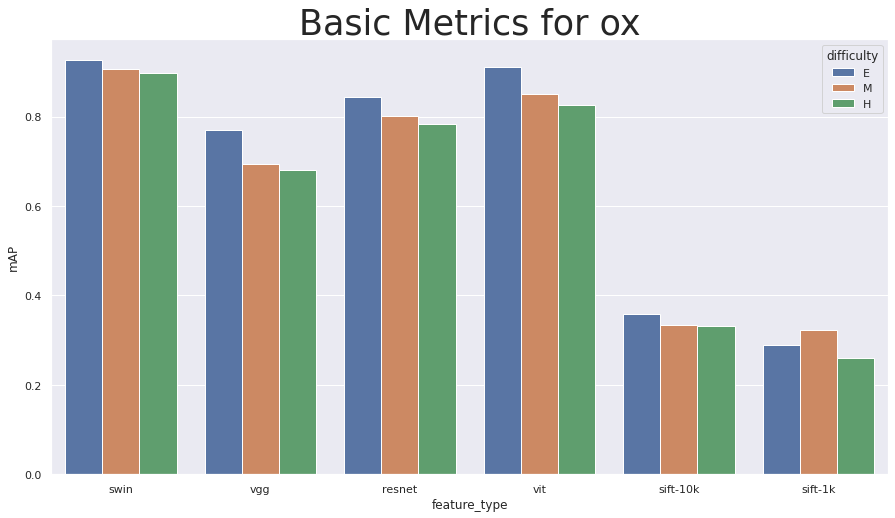

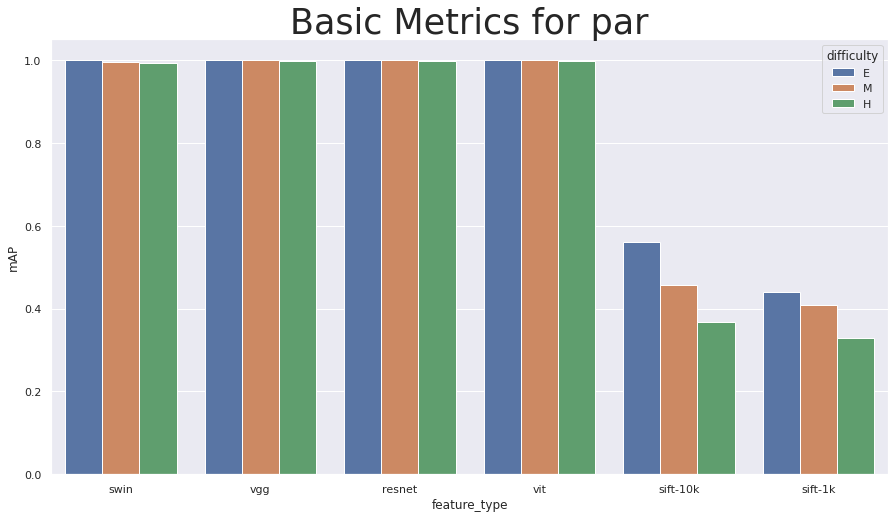

In [38]:
for dat_set in ["ox", "par"]:
    view = results[(results["query type"] == "basic") & (results["dataset"] == dat_set) & (results["distance metric"] == "cosine")]
    sns.barplot(data=view, x="feature_type", y="mAP", hue="difficulty")
    plt.title("Basic Metrics for {}".format(dat_set), fontdict={"fontsize" : 35})
    plt.show()

## Impact of Query Expansion


Text(0.5, 1.0, 'Impact of Naive Query Expansion on Oxford Dataset')

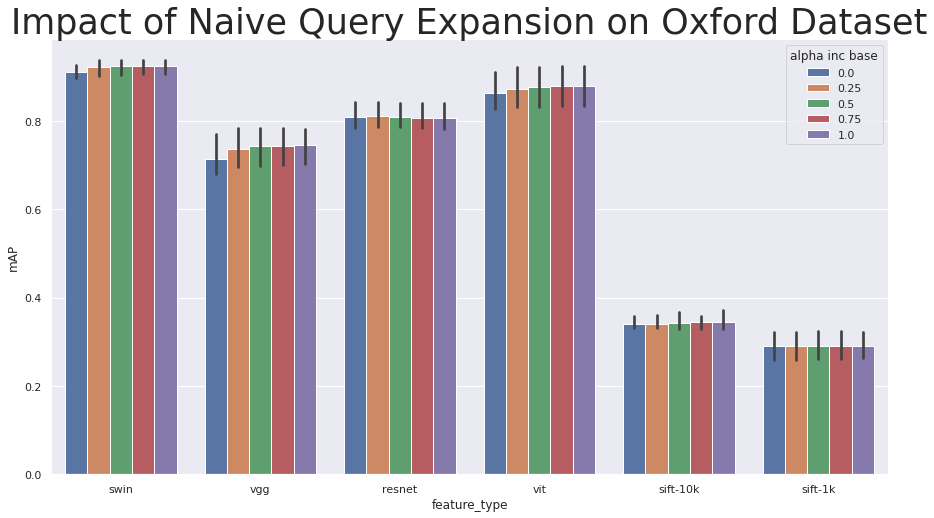

In [60]:
view = results[(results["distance metric"] == "cosine") & (results["query type"] != "diffusion") & (results["dataset"] == "ox")]

sns.barplot(data=view, x="feature_type", y="mAP", hue="alpha inc base")
plt.title("Impact of Naive Query Expansion on Oxford Dataset", fontdict={"fontsize" : 35})

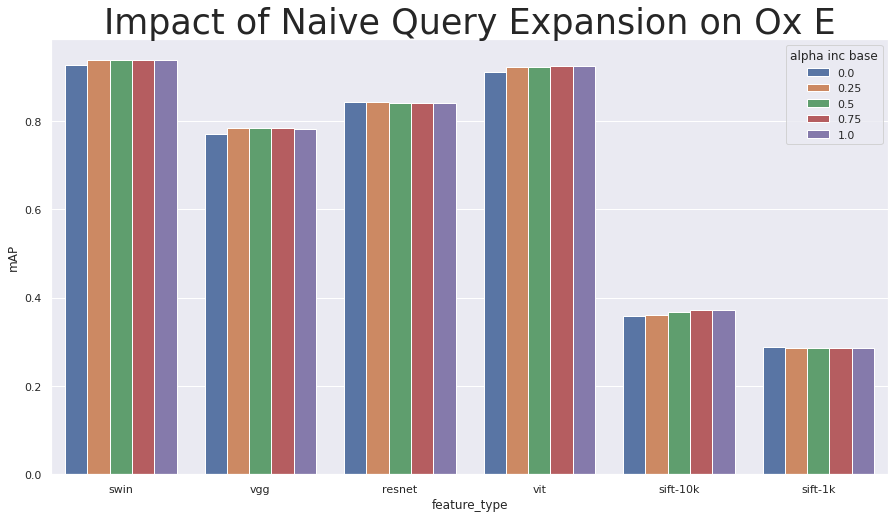

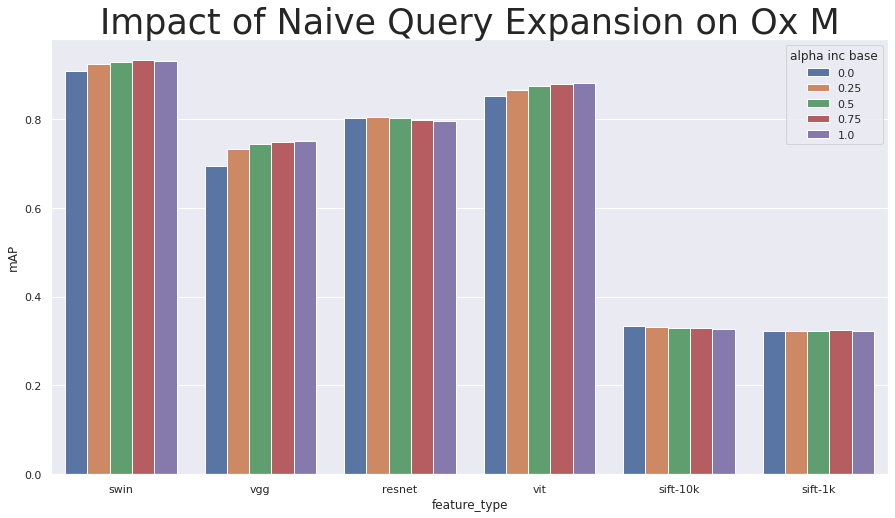

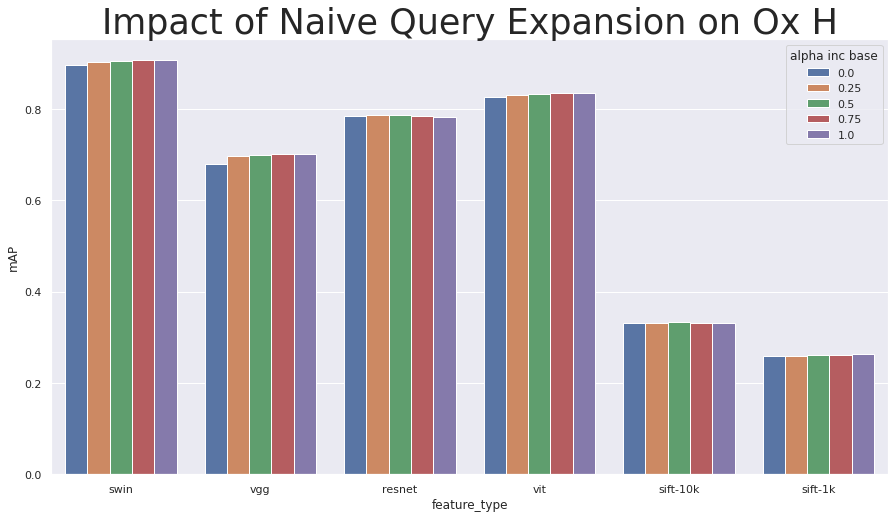

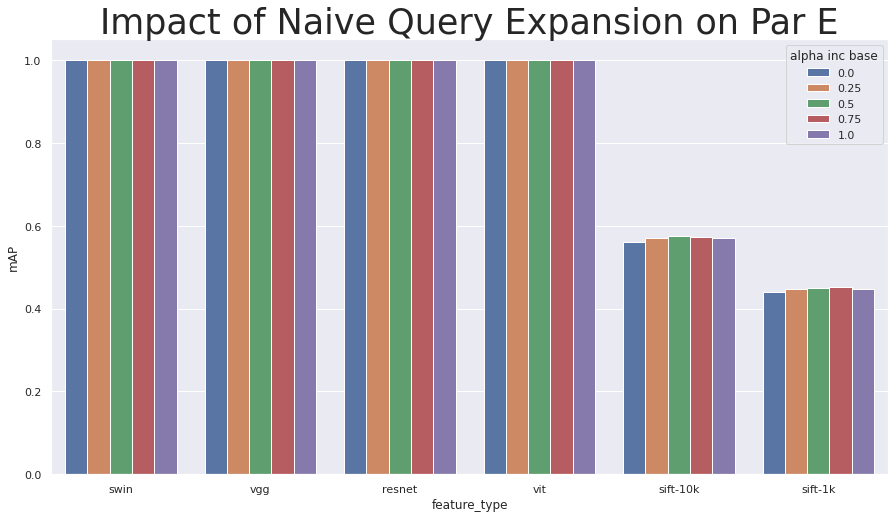

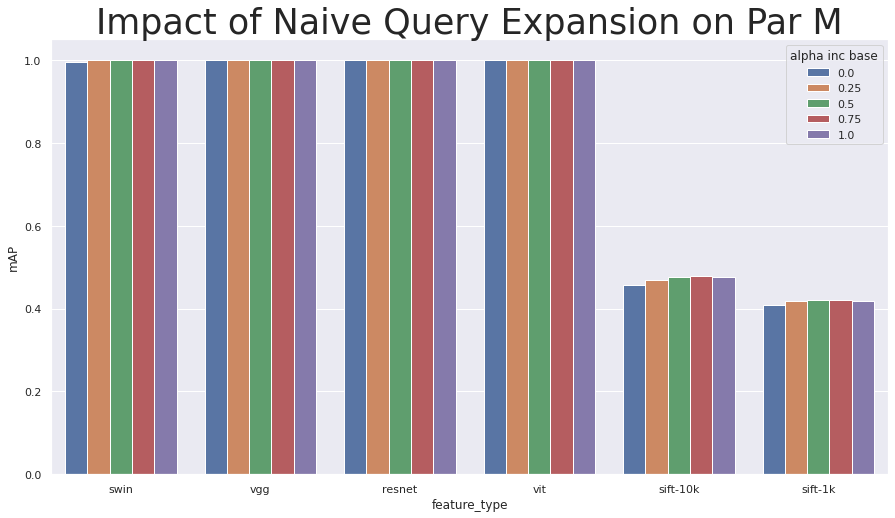

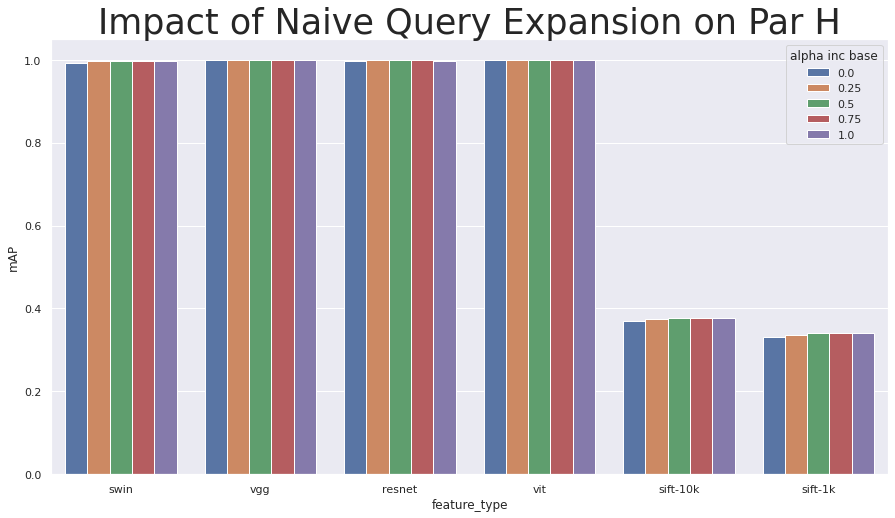

In [64]:
for dat_set in ["ox", "par"]:
    for difficulty in ["E", "M", "H"]:
        view = results[(results["distance metric"] == "cosine") & (results["query type"] != "diffusion") &
                       (results["dataset"] == dat_set) & (results["difficulty"] == difficulty)]

        sns.barplot(data=view, x="feature_type", y="mAP", hue="alpha inc base")
        plt.title("Impact of Naive Query Expansion on {} {}".format(dat_set.title(), difficulty), fontdict={"fontsize" : 35})
        plt.show()

## Impact of Diffusion

In [67]:
# diffusion scaling
# premulitiplied both query and gallery arrays by a scalar to prevent diffusion erroring out.

results[results["diffusion scalar"] > 1]

,feature_type,dataset,difficulty,query type,alpha,diffusion scalar,distance metric,mAP,precision at 1,precision at 5,precision at 10,data + diff,alpha inc base
285,sift-10k,ox,M,diffusion,NaN,10.0,NaN,0.341910,0.514286,0.428571,0.388571,ox M,NaN
318,sift-10k,par,M,diffusion,NaN,10.0,NaN,0.498554,0.771429,0.717143,0.694286,par M,NaN
329,sift-10k,par,H,diffusion,NaN,10.0,NaN,0.425676,0.614286,0.614286,0.614286,par H,NaN


<AxesSubplot:xlabel='feature_type', ylabel='mAP'>

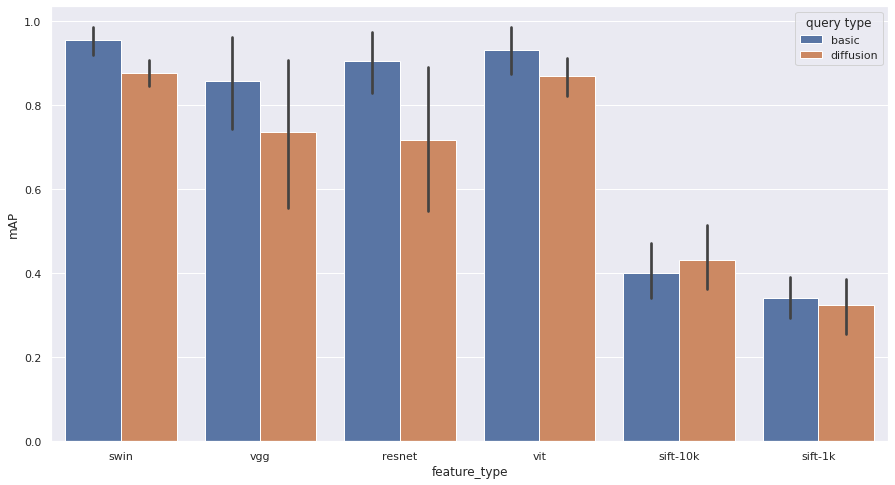

In [68]:
view = results[(results["query type"] != "expanded") & (results["distance metric"] != "euclidean")]

sns.barplot(data=view, x="feature_type", y="mAP", hue="query type")

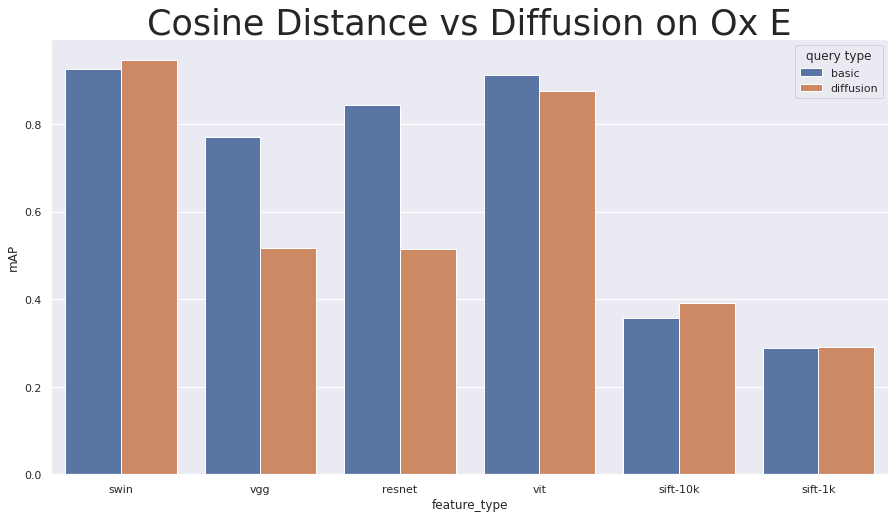

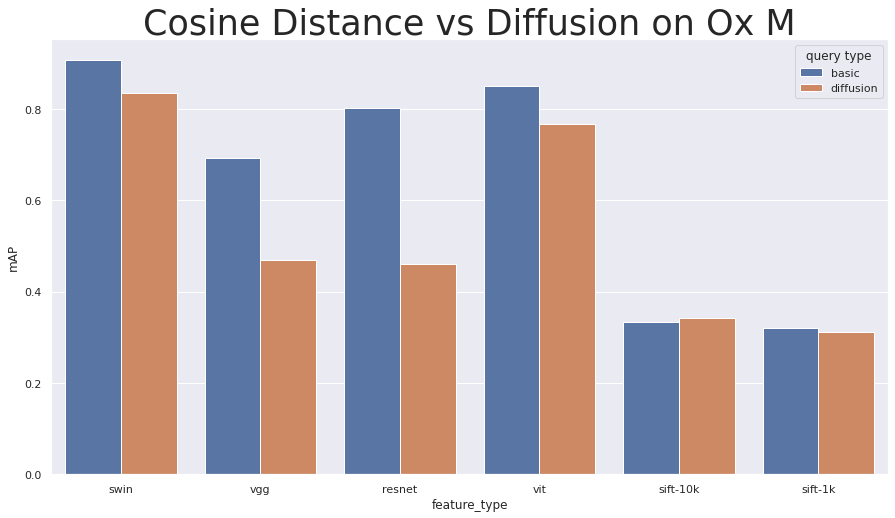

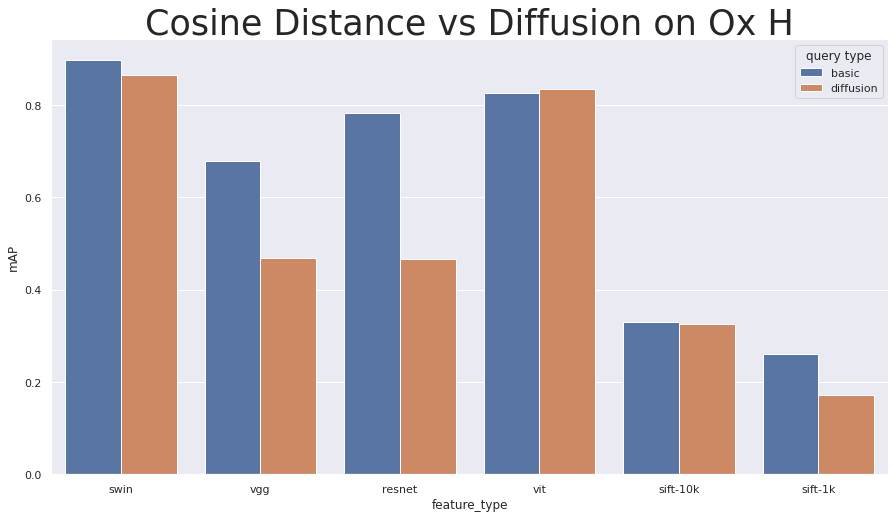

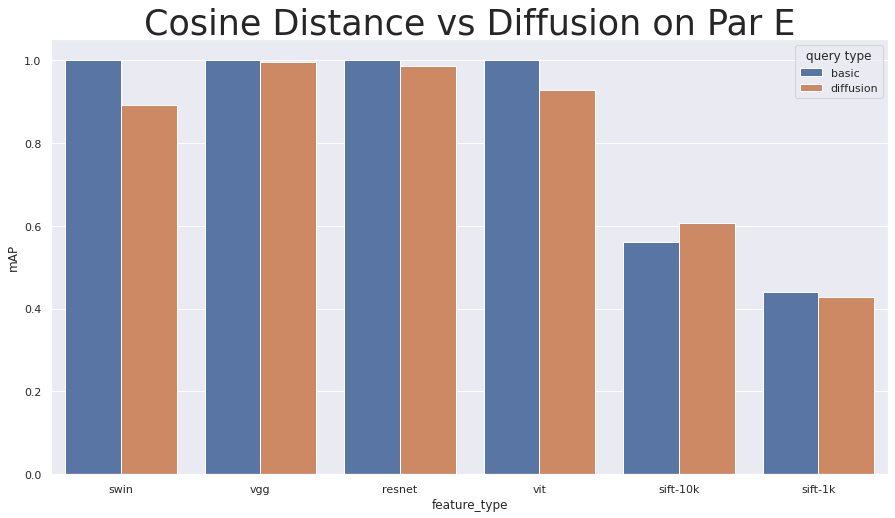

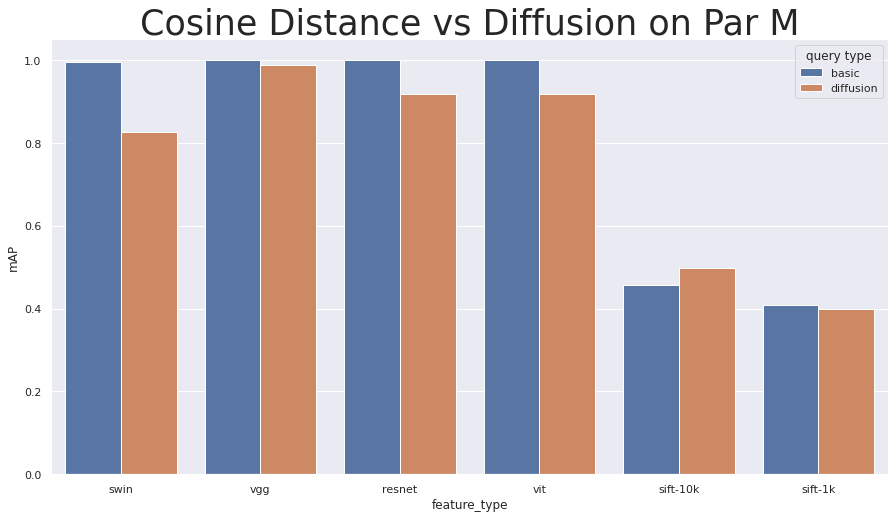

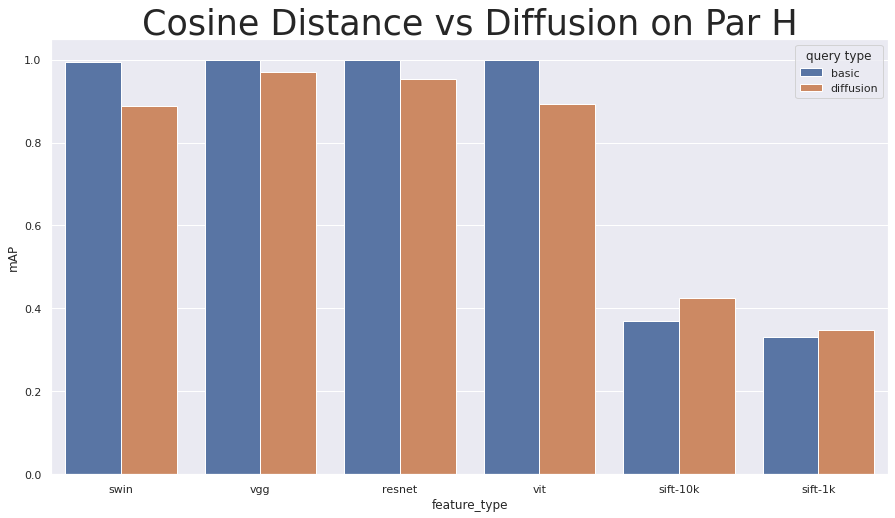

In [69]:
for dat_set in ["ox", "par"]:
    for difficulty in ["E", "M", "H"]:
        view = results[(results["distance metric"] != "euclidean") & (results["query type"] != "expanded") &
                       (results["dataset"] == dat_set) & (results["difficulty"] == difficulty)]

        sns.barplot(data=view, x="feature_type", y="mAP", hue="query type")
        plt.title("Cosine Distance vs Diffusion on {} {}".format(dat_set.title(), difficulty), fontdict={"fontsize" : 35})
        plt.show()

## General Results

In [81]:
view = results[np.logical_not(np.isin(results["alpha"], [0.25, 0.5, 0.75]))]
view.head(10)

,feature_type,dataset,difficulty,query type,alpha,diffusion scalar,distance metric,mAP,precision at 1,precision at 5,precision at 10,data + diff,alpha inc base,type + dist metric
0,swin,ox,E,basic,NaN,NaN,euclidean,0.883828,0.885714,0.737143,0.672857,ox E,0.0,basic euclidean
4,swin,ox,E,expanded,1.0,NaN,euclidean,0.881425,0.885714,0.737143,0.670000,ox E,1.0,expanded euclidean
5,swin,ox,E,basic,NaN,NaN,cosine,0.926136,0.942857,0.782857,0.718571,ox E,0.0,basic cosine
9,swin,ox,E,expanded,1.0,NaN,cosine,0.937513,0.942857,0.782857,0.721429,ox E,1.0,expanded cosine
10,swin,ox,E,diffusion,NaN,1.0,NaN,0.946204,0.928571,0.800000,0.735714,ox E,NaN,diffusion
11,swin,ox,M,basic,NaN,NaN,euclidean,0.868587,0.914286,0.794286,0.762857,ox M,0.0,basic euclidean
15,swin,ox,M,expanded,1.0,NaN,euclidean,0.870454,0.914286,0.794286,0.765714,ox M,1.0,expanded euclidean
16,swin,ox,M,basic,NaN,NaN,cosine,0.907351,0.942857,0.842857,0.805714,ox M,0.0,basic cosine
20,swin,ox,M,expanded,1.0,NaN,cosine,0.930988,0.942857,0.842857,0.821429,ox M,1.0,expanded cosine
21,swin,ox,M,diffusion,NaN,1.0,NaN,0.836142,0.871429,0.797143,0.780000,ox M,NaN,diffusion


<AxesSubplot:xlabel='type + dist metric', ylabel='mAP'>

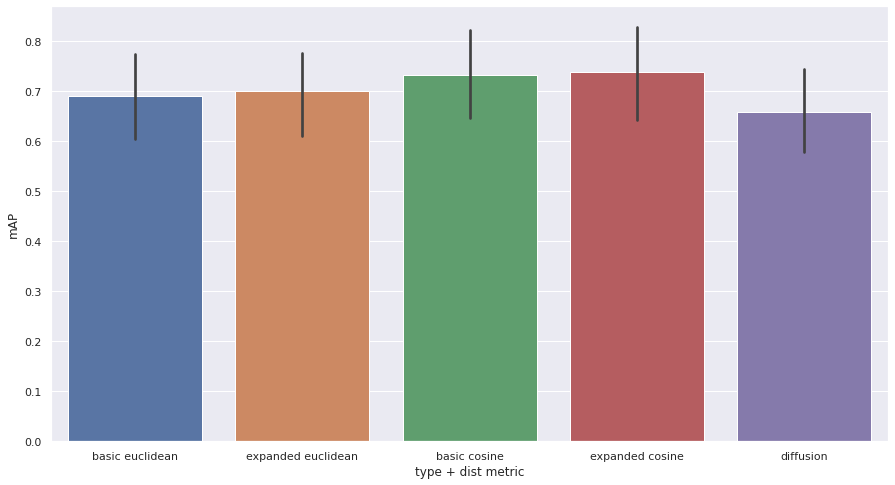

In [82]:
sns.barplot(data=view, x="type + dist metric", y="mAP")

<AxesSubplot:xlabel='feature_type', ylabel='mAP'>

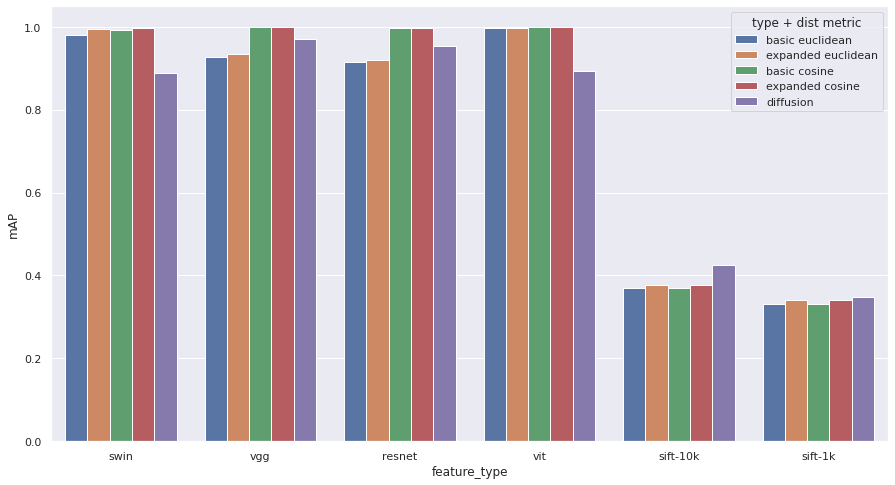

In [88]:
sns.barplot(data=view, hue="type + dist metric", x= "feature_type", y="mAP")

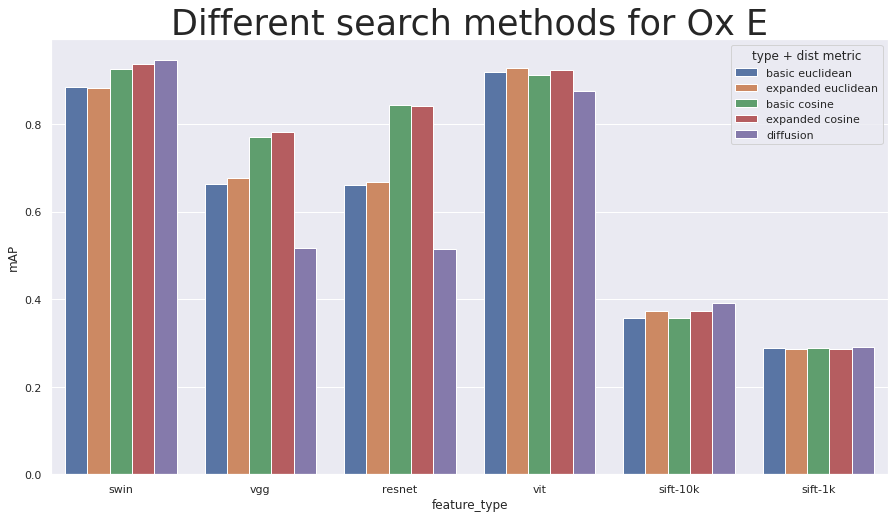

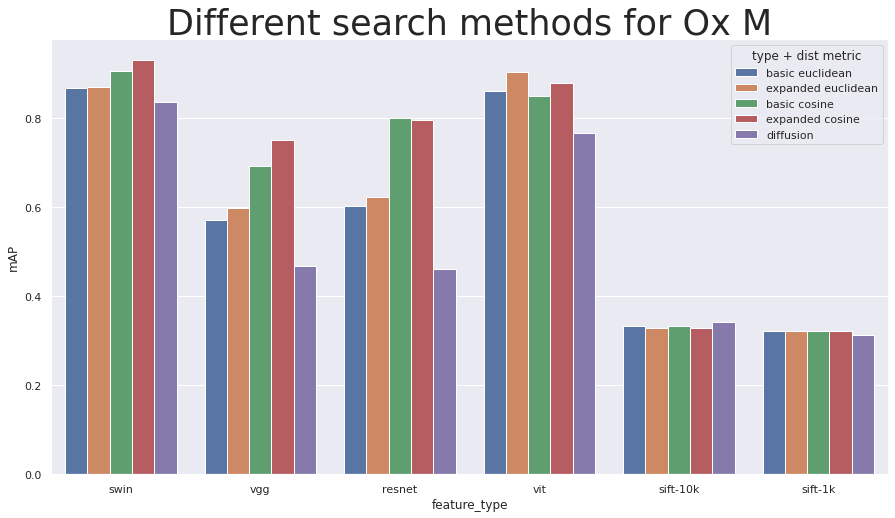

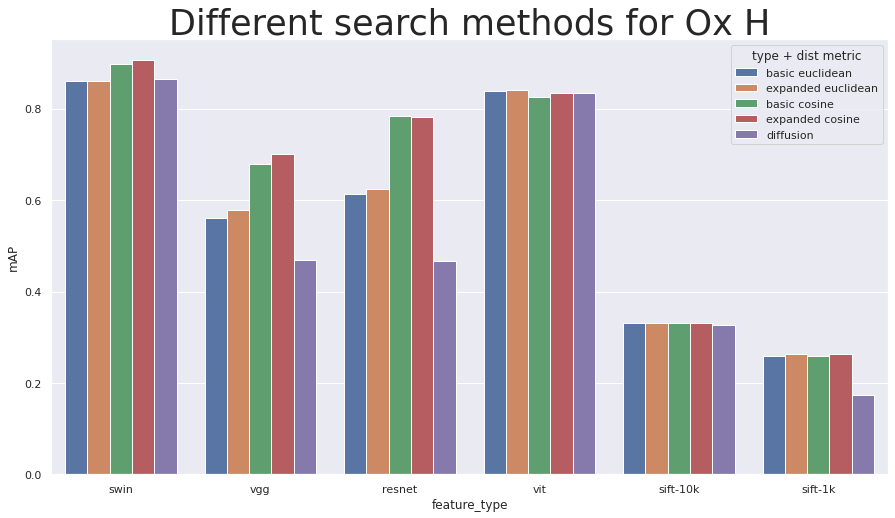

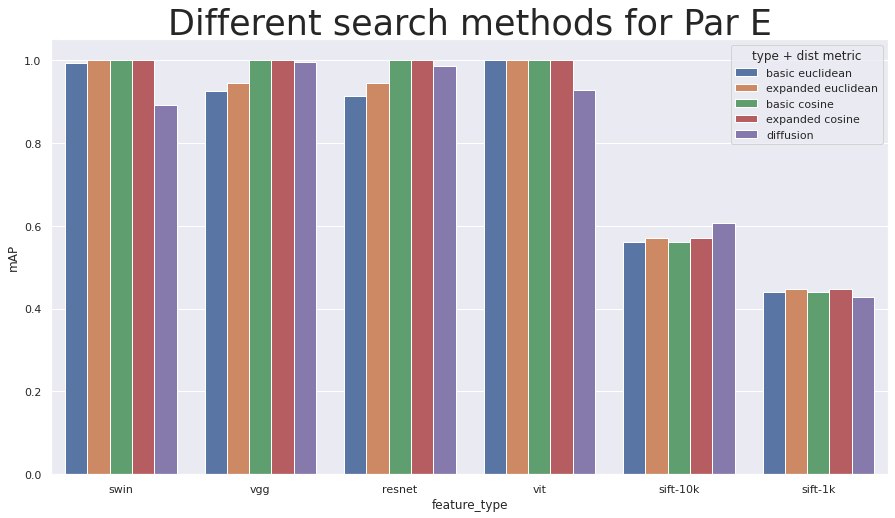

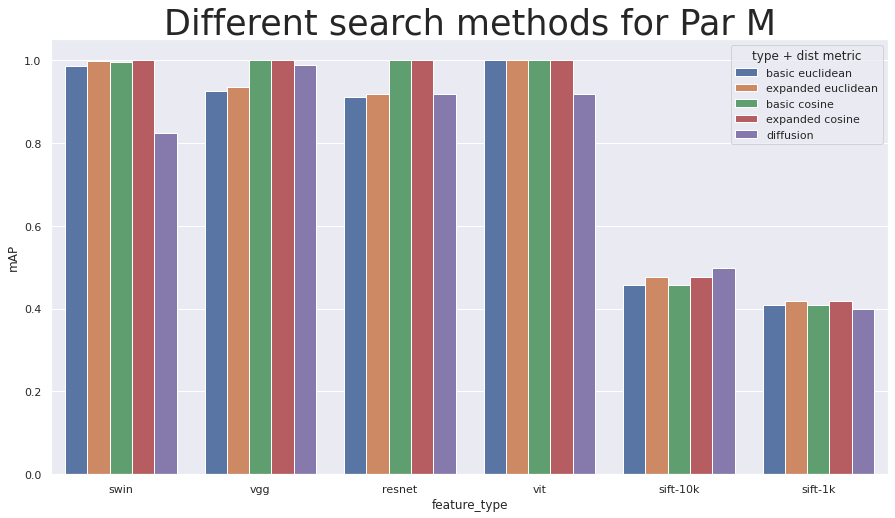

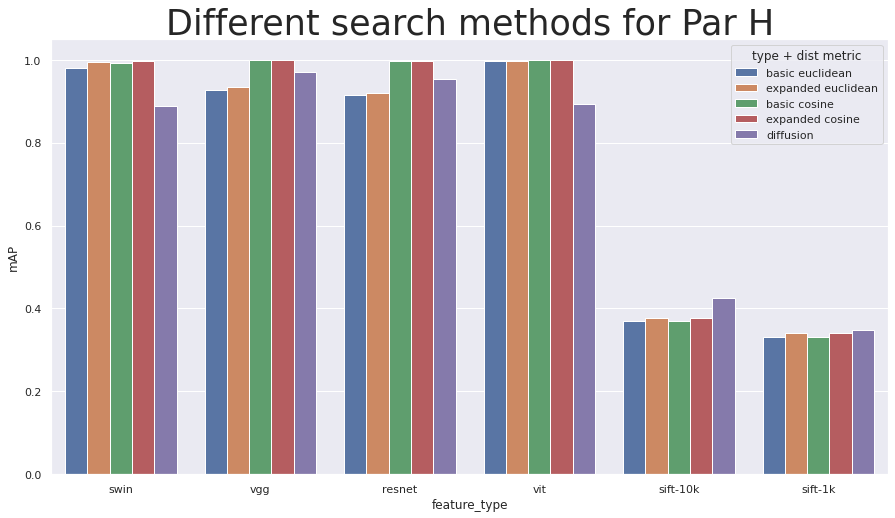

In [86]:
base_view = results[np.logical_not(np.isin(results["alpha"], [0.25, 0.5, 0.75]))]

for dat_set in ["ox", "par"]:
    for difficulty in ["E", "M", "H"]:
        view = base_view[(base_view["dataset"] == dat_set) & (base_view["difficulty"] == difficulty)]
        
        sns.barplot(data=view, x="feature_type", y="mAP", hue="type + dist metric")
        plt.title("Different search methods for {} {}".format(dat_set.title(), difficulty), fontdict={"fontsize" : 35})
        plt.show()

In [84]:
view

,feature_type,dataset,difficulty,query type,alpha,diffusion scalar,distance metric,mAP,precision at 1,precision at 5,precision at 10,data + diff,alpha inc base,type + dist metric
55,swin,par,H,basic,NaN,NaN,euclidean,0.979430,1.000000,0.997143,0.991429,par H,0.0,basic euclidean
59,swin,par,H,expanded,1.0,NaN,euclidean,0.993823,1.000000,0.997143,0.998571,par H,1.0,expanded euclidean
60,swin,par,H,basic,NaN,NaN,cosine,0.993382,1.000000,0.997143,0.997143,par H,0.0,basic cosine
64,swin,par,H,expanded,1.0,NaN,cosine,0.997695,1.000000,0.997143,0.998571,par H,1.0,expanded cosine
65,swin,par,H,diffusion,NaN,1.0,NaN,0.887773,0.928571,0.934286,0.937143,par H,NaN,diffusion
121,vgg,par,H,basic,NaN,NaN,euclidean,0.926256,1.000000,1.000000,0.995714,par H,0.0,basic euclidean
125,vgg,par,H,expanded,1.0,NaN,euclidean,0.935475,1.000000,1.000000,1.000000,par H,1.0,expanded euclidean
126,vgg,par,H,basic,NaN,NaN,cosine,0.998728,1.000000,1.000000,1.000000,par H,0.0,basic cosine
130,vgg,par,H,expanded,1.0,NaN,cosine,0.999109,1.000000,1.000000,1.000000,par H,1.0,expanded cosine
131,vgg,par,H,diffusion,NaN,1.0,NaN,0.970810,1.000000,0.985714,0.992857,par H,NaN,diffusion
